# Melbourne Housing Snapshot

The purpose of this is to perform exploratory data analysis on the Melbourne Housing dataset and to see how expensive housing is.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\Mouth\Documents\Datasets\Local Projects\Melbourne_Housing\melb_data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.iloc[:, 0:10].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0


In [5]:
df.iloc[:, 10:].head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Data Cleaning

In [7]:
# Drop unecessary columns
df.drop(columns=[
    'Method',
    'SellerG',
    'Date',
    'Postcode',
    'YearBuilt',
    'CouncilArea',
    'Propertycount',
    'BuildingArea',
    'Landsize'
], inplace= True)

In [8]:
# Rename columns
df.rename(columns={
    'Bedroom2': 'Bedrooms',
    'Bathroom': 'Bathrooms',
    'Car': 'Car Parks',
    'Regionname': 'Region'
}, inplace= True)

In [9]:
# Check for duplicate rows
if df.duplicated().any():
    print("Duplicates have been found!")
    # Show duplicate rows
    duplicates = df[df.duplicated()]
    print("Duplicates Rows:")
    print(duplicates)
else:
    print("No duplicates found!")

Duplicates have been found!
Duplicates Rows:
                Suburb            Address  Rooms Type      Price  Distance  \
1344         Brunswick     8/2 Pottery Ct      3    t   641000.0       5.2   
1584        Camberwell  3/220 Warrigal Rd      2    u   435000.0       7.8   
2732         Footscray      4 Adelaide St      4    h  1225000.0       6.4   
3658               Kew  2/27 Pakington St      2    u   610000.0       5.6   
3710          Kew East      36 Belford Rd      4    h  1315000.0       7.5   
4631       Pascoe Vale         2 Hazel Gr      2    h   915000.0       9.9   
5136         Reservoir  2/102 Rathcown Rd      2    u   440000.0      11.2   
5186         Reservoir     9/99 Barton St      2    u   335000.0      11.2   
7770            Coburg     69 Victoria St      3    t   720000.0       7.8   
8646        Kensington    33 McCracken St      4    h  1817000.0       4.2   
9634      Moonee Ponds   36 Aberfeldie St      3    h  1850000.0       6.2   
9994          Oak P

In [10]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Check for missing values
missing_value_count = df.isna().sum()
print("Missing Values Per Column:")
print(missing_value_count.sort_values(ascending=False))

# Percentage of missing values
percent_missing_col = round(missing_value_count.sort_values(ascending=False) / df.shape[0] * 100.0, 2)
print("\nPercent Missing Per Column:")
print(percent_missing_col)

Missing Values Per Column:
Car Parks     62
Suburb         0
Address        0
Rooms          0
Type           0
Price          0
Distance       0
Bedrooms       0
Bathrooms      0
Lattitude      0
Longtitude     0
Region         0
dtype: int64

Percent Missing Per Column:
Car Parks     0.46
Suburb        0.00
Address       0.00
Rooms         0.00
Type          0.00
Price         0.00
Distance      0.00
Bedrooms      0.00
Bathrooms     0.00
Lattitude     0.00
Longtitude    0.00
Region        0.00
dtype: float64


In [12]:
# Drop rows where Car Parks are NaN
df.drop(df[df['Car Parks'].isna()].index, inplace=True)

In [13]:
# Check for correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13497 entries, 0 to 13579
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      13497 non-null  object 
 1   Address     13497 non-null  object 
 2   Rooms       13497 non-null  int64  
 3   Type        13497 non-null  object 
 4   Price       13497 non-null  float64
 5   Distance    13497 non-null  float64
 6   Bedrooms    13497 non-null  float64
 7   Bathrooms   13497 non-null  float64
 8   Car Parks   13497 non-null  float64
 9   Lattitude   13497 non-null  float64
 10  Longtitude  13497 non-null  float64
 11  Region      13497 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.3+ MB


In [14]:
# Convert to columns to appropriate data types
df = df.convert_dtypes()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13497 entries, 0 to 13579
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      13497 non-null  string 
 1   Address     13497 non-null  string 
 2   Rooms       13497 non-null  Int64  
 3   Type        13497 non-null  string 
 4   Price       13497 non-null  Int64  
 5   Distance    13497 non-null  Float64
 6   Bedrooms    13497 non-null  Int64  
 7   Bathrooms   13497 non-null  Int64  
 8   Car Parks   13497 non-null  Int64  
 9   Lattitude   13497 non-null  Float64
 10  Longtitude  13497 non-null  Float64
 11  Region      13497 non-null  string 
dtypes: Float64(3), Int64(5), string(4)
memory usage: 1.4 MB


In [16]:
# Check for consistent formatting in Suburb column
df['Suburb'].unique().tolist()
df['Suburb'] = df['Suburb'].apply(lambda x: x.strip())

In [17]:
# Check for consistent formatting in Address column
df['Address'].unique().tolist()
df['Address'] = df['Address'].apply(lambda x: x.strip())

In [18]:
# Check for consistent formatting in Type column
df['Type'].unique().tolist()
df['Type'].replace({'h': 'house', 'u': 'unit', 't': 'townhouse'}, inplace= True)

In [19]:
# Validate ranges of numerical columns
df.describe()

,Rooms,Price,Distance,Bedrooms,Bathrooms,Car Parks,Lattitude,Longtitude
count,13497.000000,1.349700e+04,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000
mean,2.940283,1.075074e+06,10.159576,2.916870,1.535378,1.610284,-37.809204,144.995322
std,0.956364,6.400868e+05,5.858152,0.966646,0.692568,0.962705,0.079324,0.104051
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,-37.857000,144.929500
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,-37.802360,145.000300
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,-37.756300,145.058600
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,-37.408530,145.526350


In [20]:
# Check rows with 0 bathrooms since that is unreasonable for a housing unit to not have one
print("Number of rows with 0 bathrooms: {}".format((df['Bathrooms'] == 0).sum()))

Number of rows with 0 bathrooms: 34


In [21]:
# Remove 34 rows with 0 bathrooms
df.drop(df[df['Bathrooms'] == 0].index, inplace= True)

In [22]:
# Check rows with 20 bedrooms
df[df['Bedrooms'] >= 10]

# Drop
df.drop(7404, inplace= True)

In [23]:
df.describe()

,Rooms,Price,Distance,Bedrooms,Bathrooms,Car Parks,Lattitude,Longtitude
count,13462.000000,1.346200e+04,13462.000000,13462.000000,13462.000000,13462.000000,13462.000000,13462.000000
mean,2.941465,1.075488e+06,10.166491,2.917843,1.539296,1.614248,-37.809158,144.995290
std,0.956675,6.405388e+05,5.862069,0.954080,0.689134,0.960624,0.079372,0.104137
min,1.000000,8.500000e+04,0.000000,0.000000,1.000000,0.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,-37.857000,144.929210
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,-37.802210,145.000300
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,-37.756125,145.058630
max,10.000000,9.000000e+06,48.100000,10.000000,8.000000,10.000000,-37.408530,145.526350


In [24]:
df.head()

,Suburb,Address,Rooms,Type,Price,Distance,Bedrooms,Bathrooms,Car Parks,Lattitude,Longtitude,Region
0,Abbotsford,85 Turner St,2,house,1480000,2.5,2,1,1,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,house,1035000,2.5,2,1,0,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,5 Charles St,3,house,1465000,2.5,3,2,0,-37.8093,144.9944,Northern Metropolitan
3,Abbotsford,40 Federation La,3,house,850000,2.5,3,2,1,-37.7969,144.9969,Northern Metropolitan
4,Abbotsford,55a Park St,4,house,1600000,2.5,3,1,2,-37.8072,144.9941,Northern Metropolitan


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13462 entries, 0 to 13579
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      13462 non-null  object 
 1   Address     13462 non-null  object 
 2   Rooms       13462 non-null  Int64  
 3   Type        13462 non-null  string 
 4   Price       13462 non-null  Int64  
 5   Distance    13462 non-null  Float64
 6   Bedrooms    13462 non-null  Int64  
 7   Bathrooms   13462 non-null  Int64  
 8   Car Parks   13462 non-null  Int64  
 9   Lattitude   13462 non-null  Float64
 10  Longtitude  13462 non-null  Float64
 11  Region      13462 non-null  string 
dtypes: Float64(3), Int64(5), object(2), string(2)
memory usage: 1.4+ MB


## Data Analysis

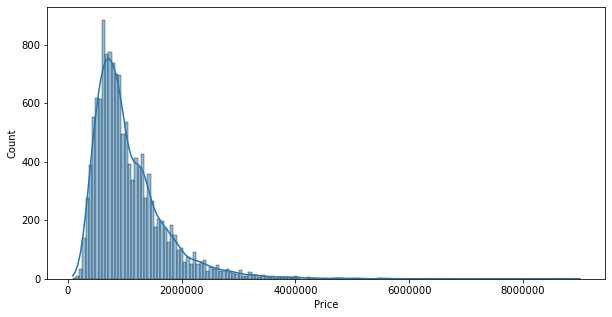

In [26]:
# Histogram of the housing prices
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Price', kde=True)
plt.title("")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [47]:
# What is the average price of a housing unit in Melbourne?
round(df['Price'].mean())

1075488

In [48]:
df['Price'].describe()

count    1.346200e+04
mean     1.075488e+06
std      6.405388e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.010000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

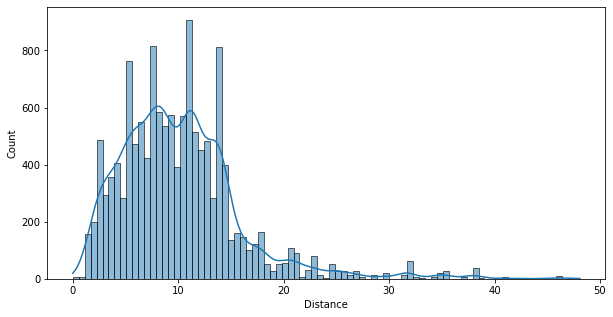

In [27]:
# Histogram of the distance to central business district (cbd)
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Distance', kde=True)
plt.title("")
plt.show()

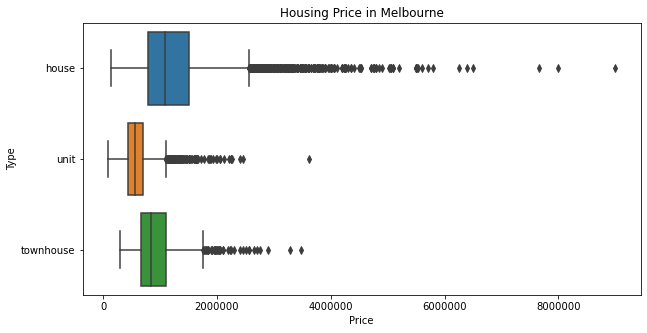

In [49]:
# Housing price box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Type', x='Price')
plt.title("Housing Price in Melbourne")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Housing Price in Melbourne:
        Type       mean      max     min     median
0      house  1242409.0  9000000  131000  1080000.0
1  townhouse   933930.0  3475000  300000   846000.0
2       unit   605288.0  3625000   85000   560000.0


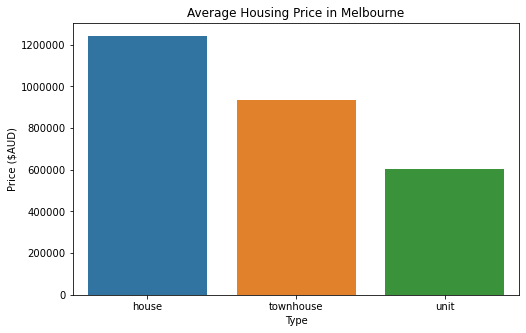

In [53]:
# What is the average price for each housing type in Melbourne?
avg_house_price = df.groupby('Type')['Price'].agg(['mean', 'max', 'min', 'median']).round().reset_index()

print("Housing Price in Melbourne:")
print(avg_house_price)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_house_price, x='Type', y='mean')
plt.title("Average Housing Price in Melbourne")
plt.xlabel("Type")
plt.ylabel("Price ($AUD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [60]:
# Display price descriptive statistics for each type of housing
housing_type = ['house', 'townhouse', 'unit']

for h_type in housing_type:
    print("{} descriptive statistics:".format(h_type))
    print(df[df['Type'] == h_type]['Price'].describe())
    print("")

house descriptive statistics:
count    9.363000e+03
mean     1.242409e+06
std      6.698702e+05
min      1.310000e+05
25%      7.900000e+05
50%      1.080000e+06
75%      1.500000e+06
max      9.000000e+06
Name: Price, dtype: float64

townhouse descriptive statistics:
count    1.109000e+03
mean     9.339295e+05
std      3.957392e+05
min      3.000000e+05
25%      6.700000e+05
50%      8.460000e+05
75%      1.105000e+06
max      3.475000e+06
Name: Price, dtype: float64

unit descriptive statistics:
count    2.990000e+03
mean     6.052883e+05
std      2.614153e+05
min      8.500000e+04
25%      4.400000e+05
50%      5.600000e+05
75%      7.057500e+05
max      3.625000e+06
Name: Price, dtype: float64



                       Region      Price
0       Southern Metropolitan  1374652.0
1        Eastern Metropolitan  1104551.0
2  South-Eastern Metropolitan   921584.0
3       Northern Metropolitan   896592.0
4        Western Metropolitan   866422.0
5            Eastern Victoria   699981.0
6           Northern Victoria   594700.0
7            Western Victoria   397523.0


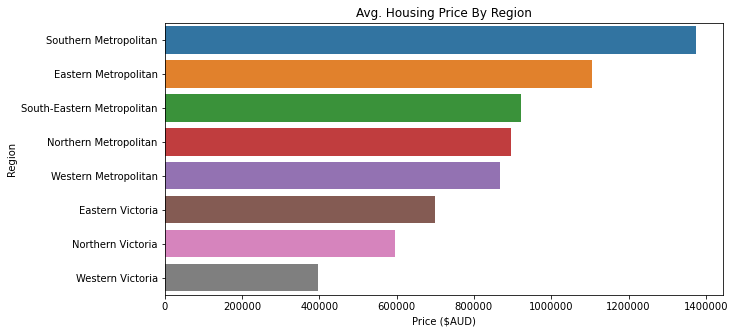

In [53]:
# What is the average price for housing in each region?
avg_price = df.groupby('Region')['Price'].mean().round().sort_values(ascending=False).reset_index()
print(avg_price)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=avg_price, x='Price', y='Region')
plt.title("Avg. Housing Price By Region")
plt.xlabel('Price ($AUD)')
plt.ylabel('Region')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

         Type                      Region      Price
0       house        Eastern Metropolitan  1197692.0
1       house            Eastern Victoria   714300.0
2       house       Northern Metropolitan  1018902.0
3       house           Northern Victoria   594700.0
4       house  South-Eastern Metropolitan   954543.0
5       house       Southern Metropolitan  1807032.0
6       house        Western Metropolitan   950842.0
7       house            Western Victoria   397523.0
8   townhouse        Eastern Metropolitan   867993.0
9   townhouse       Northern Metropolitan   750061.0
10  townhouse  South-Eastern Metropolitan   913270.0
11  townhouse       Southern Metropolitan  1206300.0
12  townhouse        Western Metropolitan   720951.0
13       unit        Eastern Metropolitan   650372.0
14       unit            Eastern Victoria   461333.0
15       unit       Northern Metropolitan   544209.0
16       unit  South-Eastern Metropolitan   583365.0
17       unit       Southern Metropolitan   66

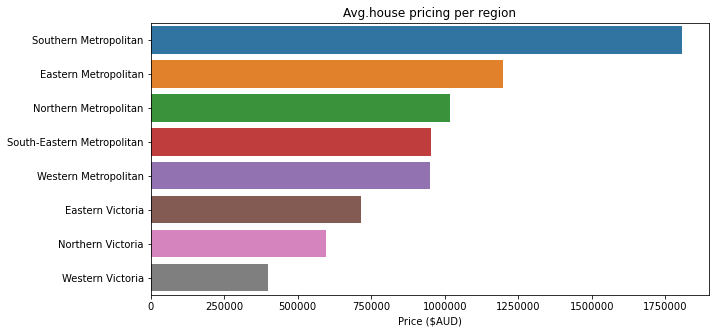

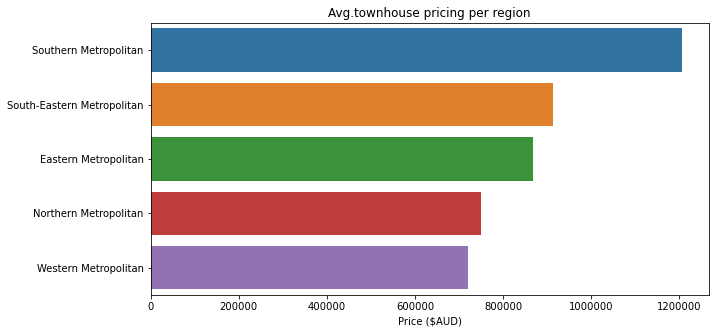

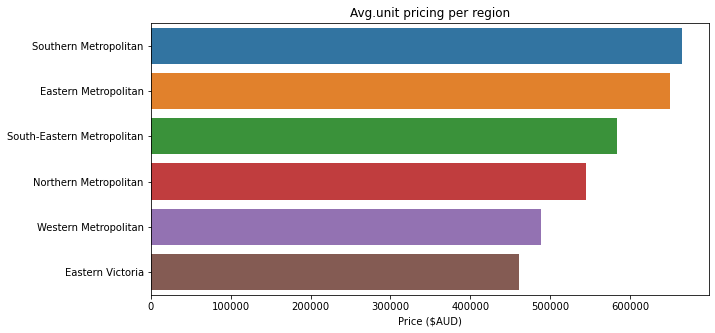

In [88]:
# What is the average price for each housing in each region?
avg_price_region = df.groupby(['Type', 'Region'])['Price'].mean().round(0).reset_index()
print(avg_price_region)
housing_type = ['house', 'townhouse', 'unit']

# Iterate through each housing type
for h_type in housing_type:
    plt.figure(figsize=(10,5))
    region_df = avg_price_region[avg_price_region['Type'] == h_type].sort_values('Price', ascending=False)
    
    sns.barplot(data=region_df, x='Price', y='Region')
    plt.title(f"Avg.{h_type} pricing per region")
    plt.xlabel('Price ($AUD)')
    plt.ylabel('')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

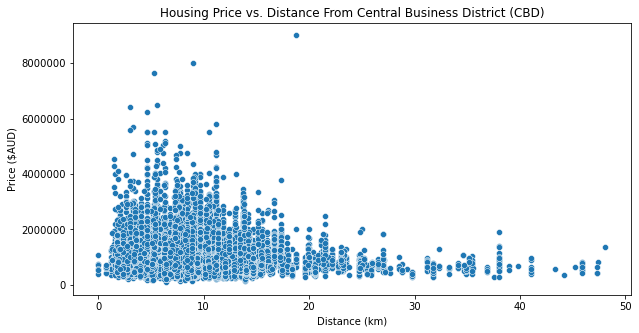

In [41]:
# To what degree does housing price change with relations to distance to the CBD (Central Business District)?
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title("Housing Price vs. Distance From Central Business District (CBD)")
plt.xlabel('Distance (km)')
plt.ylabel('Price ($AUD)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


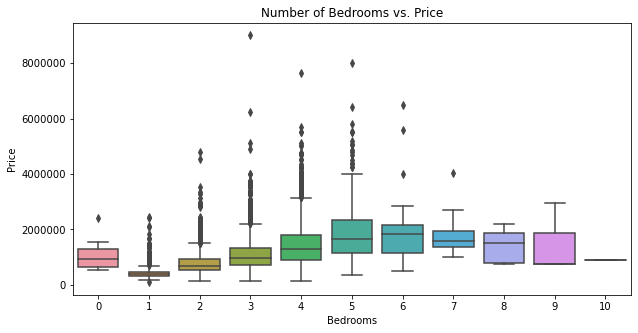

In [32]:
# Price vs number of bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Bedrooms', y='Price')
plt.title("Number of Bedrooms vs. Price")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Average price vs number of bedrooms
plt.figure(figsize=(10,5))
sns.